<a href="https://colab.research.google.com/github/BindiyaB/DataSciencePractice/blob/master/Imputation_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn.datasets import load_boston
import numpy as np
# https://pypi.org/project/fancyimpute/
np.random.seed(0)

In [0]:
boston = load_boston()
X=boston.data
Y=boston.target

In [9]:
X.shape, Y.shape

((506, 13), (506,))

In [11]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [0]:
X=X.copy()

In [0]:
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan # Randomly make 10 values as missing

In [15]:
X_filled_knn = KNN(k=3).fit_transform(X)

Imputing row 1/506 with 0 missing, elapsed time: 0.057
Imputing row 101/506 with 0 missing, elapsed time: 0.057
Imputing row 201/506 with 0 missing, elapsed time: 0.058
Imputing row 301/506 with 0 missing, elapsed time: 0.058
Imputing row 401/506 with 0 missing, elapsed time: 0.058
Imputing row 501/506 with 0 missing, elapsed time: 0.059


In [16]:
# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
X_filled_nnm = NuclearNormMinimization().fit_transform(X) #Ask-----------------------------

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 180966
eps = 1.00e-04, alpha = 1.50, max_iters = 50000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 148096, constraints m = 161252
Cones:	primal zero / dual free vars: 6578
	linear vars: 19734
	sd vars: 134940, sd blks: 1
Setup time: 2.83e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.20e+21  4.88e+21  1.00e+00 -8.08e+26  1.46e+26  1.98e+26  1.34e-01 
   100| 7.77e-04  7.96e-04  2.30e-04  1.76e+04  1.76e+04  8.21e-12  3.03e+01 
   200| 1.51e-04  1.51e-04  9.94e-06  1.76e+04  1

In [17]:
# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_incomplete_normalized = BiScaler().fit_transform(X) #Ask ------------------------------
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

[BiScaler] Initial log residual value = 14.888305
[BiScaler] Iter 1: log residual = 3.202414, log improvement ratio=11.685890
[BiScaler] Iter 2: log residual = 2.492459, log improvement ratio=0.709956
[BiScaler] Iter 3: log residual = 1.823053, log improvement ratio=0.669406
[BiScaler] Iter 4: log residual = 1.181499, log improvement ratio=0.641554
[BiScaler] Iter 5: log residual = 0.541162, log improvement ratio=0.640336
[BiScaler] Iter 6: log residual = -0.105473, log improvement ratio=0.646635
[BiScaler] Iter 7: log residual = -0.762242, log improvement ratio=0.656769
[BiScaler] Iter 8: log residual = -1.429403, log improvement ratio=0.667161
[BiScaler] Iter 9: log residual = -2.105475, log improvement ratio=0.676072
[BiScaler] Iter 10: log residual = -2.788405, log improvement ratio=0.682929
[BiScaler] Iter 11: log residual = -3.476161, log improvement ratio=0.687756
[BiScaler] Iter 12: log residual = -4.166984, log improvement ratio=0.690824
[BiScaler] Iter 13: log residual = -4.8

In [0]:
missing_mask = np.isnan(X)

Scikitlearn imputer

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np

In [30]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X_mean_filled = imp_mean.transform(X)
print(X_mean_filled)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Error Matrics

In [31]:
# print mean squared error for the  imputation methods above
nnm_mse = ((X_filled_nnm[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

simple_mean_mse = ((X_mean_filled[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("Simple Mean Impute MSE: %f" % simple_mean_mse)



Nuclear norm minimization MSE: 10850.010146
SoftImpute MSE: 49625.567963
knnImpute MSE: 128.216236
Simple Mean Impute MSE: 327.665894


In [0]:
from matplotlib import pyplot as plt

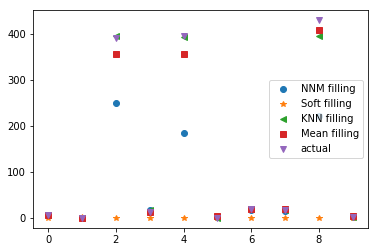

In [38]:
fig,ax=plt.subplots(1,1)
ax.plot(X_filled_nnm[missing_mask],"o",label='NNM filling')
ax.plot(X_filled_softimpute[missing_mask],"*",label='Soft filling')
ax.plot(X_filled_knn[missing_mask],"<",label='KNN filling')
ax.plot(X_mean_filled[missing_mask],"s",label='Mean filling')
ax.plot(boston.data[missing_mask],"v",label='actual')
ax.legend(loc='best') # What is loc best